Name = Goutam Kumar Sah

Roll Number = 2312res271

Experiment No = 2

Title = Decision Tree

Aim = Implementation of Decision Tree Algorithm

The Decision Tree algorithm is a popular supervised machine learning technique used for both classification and regression tasks. Its intuitive, tree-like structure makes it easy to understand and visualize. The decision tree consists of nodes, branches, and leaves. Each internal node represents a test on a feature (attribute), each branch represents the outcome of the test, and each leaf node represents the final prediction or decision.

The algorithm works by splitting data into subsets based on the value of input features, following a sequence of rules until it reaches the final decision at a leaf node. This process of splitting is guided by "impurity" metrics like Gini Index or Entropy (used in ID3, a popular decision tree algorithm). These metrics determine how well a split separates data into distinct classes or values. A "pure" split results in nodes containing data of a single class, while an "impure" node contains data from multiple classes. The goal is to achieve maximum purity at each split to ensure the tree makes accurate predictions.

**Metrics for Splitting**

* Gini Impurity: Measures the likelihood of an incorrect classification of a new instance if it was randomly classified according to the distribution of classes in the dataset.

    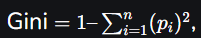


  where pi​ is the probability of an instance being classified into a particular class.

* Entropy: Measures the amount of uncertainty or impurity in the dataset.

  * 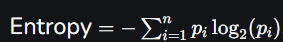

  where pi​ is the probability of an instance being classified into a particular class.

* Information Gain: Measures the reduction in entropy or Gini impurity after a dataset is split on an attribute.

  * 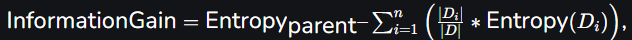
  
  where Di​ is the subset of D after splitting by an attribute.

The advantages of decision trees include their ease of interpretation, ability to handle both numerical and categorical data, and minimal need for data preprocessing (like scaling or normalization). They are also non-parametric, meaning they make no assumptions about the distribution of data, making them versatile across different datasets.

However, decision trees have limitations, such as their tendency to overfit, especially when the tree becomes too deep. Overfitting makes the model highly specific to training data, reducing its generalization on new data. Techniques like pruning, setting a maximum depth, or ensemble methods (such as Random Forest and Gradient Boosting) help mitigate overfitting.


Platform = Google Colab

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd
dataset = pd.read_csv("/content/bill_authentication.csv")
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

By Manual code Algorithm

In [10]:
import numpy as np
from collections import Counter

class TreeNode:
    def __init__(self, feature=None, threshold=None, left_branch=None, right_branch=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left_branch = left_branch
        self.right_branch = right_branch
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Stopping criteria
        if depth >= self.max_depth or n_classes == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_class(y)
            return TreeNode(value=leaf_value)

        feature_indices = np.random.choice(n_features, self.n_features, replace=False)

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y, feature_indices)

        # Create child nodes
        left_indices, right_indices = self._partition(X[:, best_feature], best_threshold)
        left_branch = self._build_tree(X[left_indices, :], y[left_indices], depth + 1)
        right_branch = self._build_tree(X[right_indices, :], y[right_indices], depth + 1)
        return TreeNode(best_feature, best_threshold, left_branch, right_branch)

    def _find_best_split(self, X, y, feature_indices):
        best_gain = -1
        split_feature, split_threshold = None, None

        for feature_index in feature_indices:
            X_column = X[:, feature_index]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                # Calculate information gain
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_feature = feature_index
                    split_threshold = threshold

        return split_feature, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # Parent entropy
        parent_entropy = self._entropy(y)

        # Create child nodes
        left_indices, right_indices = self._partition(X_column, threshold)

        if len(left_indices) == 0 or len(right_indices) == 0:
            return 0

        # Weighted average entropy of children
        n = len(y)
        n_left, n_right = len(left_indices), len(right_indices)
        entropy_left, entropy_right = self._entropy(y[left_indices]), self._entropy(y[right_indices])
        child_entropy = (n_left / n) * entropy_left + (n_right / n) * entropy_right

        # Calculate information gain
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _partition(self, X_column, threshold):
        left_indices = np.argwhere(X_column <= threshold).flatten()
        right_indices = np.argwhere(X_column > threshold).flatten()
        return left_indices, right_indices

    def _entropy(self, y):
        hist = np.bincount(y)
        probabilities = hist / len(y)
        return -np.sum([p * np.log(p) for p in probabilities if p > 0])

    def _most_common_class(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        return np.array([self._traverse_tree(sample, self.root) for sample in X])

    def _traverse_tree(self, sample, node):
        if node.is_leaf_node():
            return node.value

        if sample[node.feature] <= node.threshold:
            return self._traverse_tree(sample, node.left_branch)
        return self._traverse_tree(sample, node.right_branch)


In [11]:
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9737609329446064


By using Sklearn library

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9737609329446064
